##Samarth Motka
##202311023
##DIP_Assignment-4

1.Decompose the Building image (Fig.1) into 8 bit planes. Show the bit planes. Then recon- struct the
image back by removing three least significant bit planes. What will happen if you reconstruct the
image by removing three most significant bit planes?

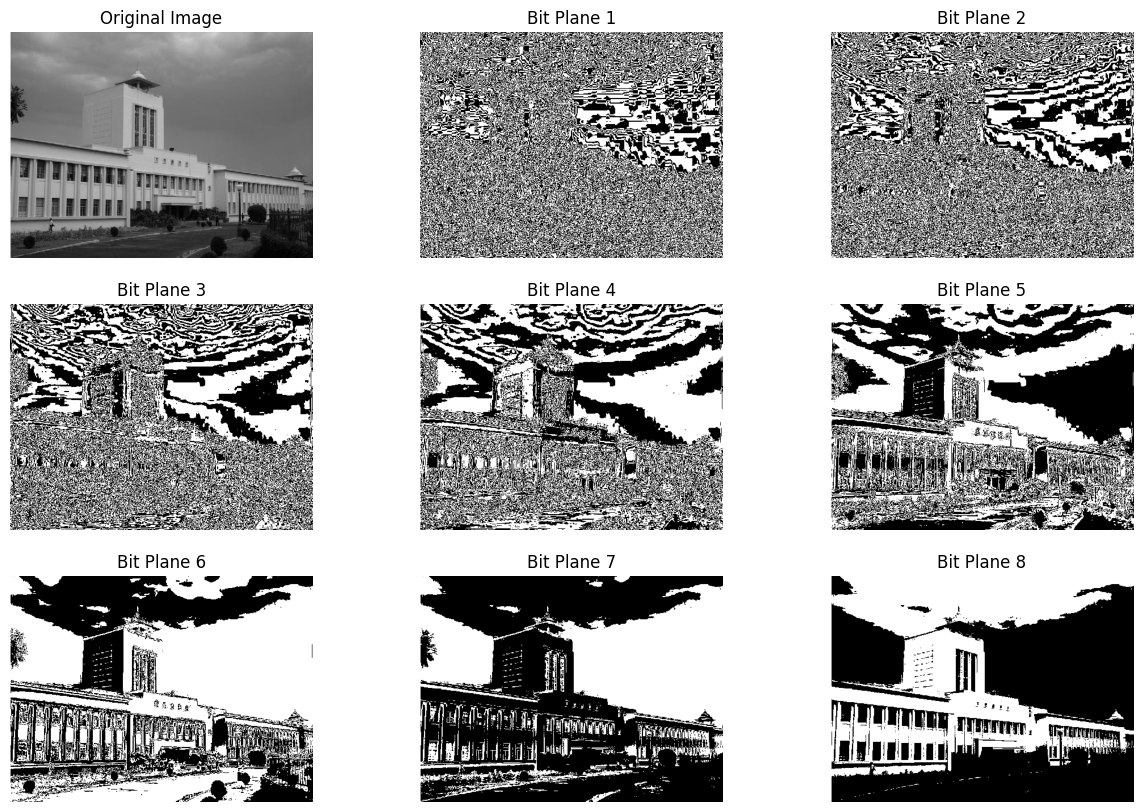

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread('/content/building.jpg')

def decompose(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    bit_planes = []

    for i in range(8):
        bit_plane = (gray_image >> i) & 1
        bit_planes.append(bit_plane * 255)
    return bit_planes

bit_planes = decompose(img)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i in range(8):
    plt.subplot(3, 3, i+2)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title('Bit Plane {}'.format(i+1))
    plt.axis('off')

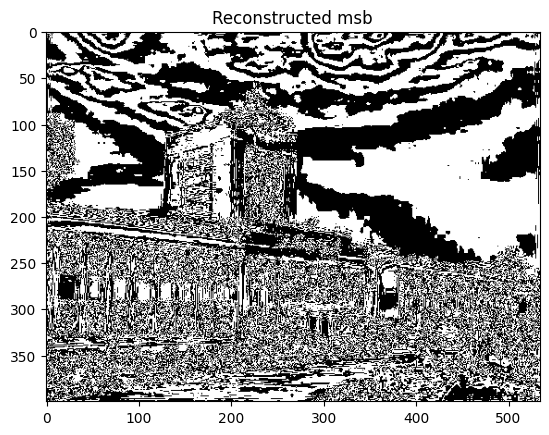

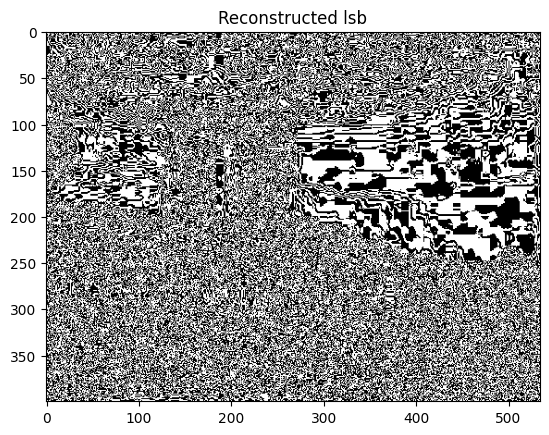

In [41]:
def reconstruct(bit_planes,bit):
  reconstructed_image = bit_planes[0]
  for i in range(1, len(bit_planes)):
    reconstructed_image =  np.bitwise_or(reconstructed_image, i)
  plt.imshow(reconstructed_image,cmap='gray')
  plt.title(f'Reconstructed {bit}')
  plt.show()
  # return reconstructed_image.astype(np.uint8)

reconstructed_msb = reconstruct(bit_planes[3:],'msb')
reconstructed_lsb = reconstruct(bit_planes[:-3],'lsb')





2.Write a program which will transform a given image (Fig.2(a)) in such a way that the resultant image
histogram is equivalent to histogram of another image (Fig.2 (b)). In the process, show the individual
histograms and the intensity transformation curve.

In [47]:
einstein_img = cv2.imread('/content/einstein.jpg', cv2.IMREAD_GRAYSCALE)
lena_img = cv2.imread('/content/lena_face.jpg', cv2.IMREAD_GRAYSCALE)


def calc_histogram(image):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i, j]] += 1
    return histogram


def find_mapping(cdf_target, cdf):
    mapping = np.zeros(256)
    for i in range(256):
        diff = np.abs(cdf_target - cdf[i])
        mapping[i] = np.argmin(diff)
    return mapping


hist_einstein = calc_histogram(einstein_img)
hist_lena = calc_histogram(lena_img)

hist_einstein_norm = hist_einstein / hist_einstein.sum()
hist_lena_norm = hist_lena / hist_lena.sum()

cdf_einstein = hist_einstein_norm.cumsum()
cdf_lena = hist_lena_norm.cumsum()


mapping = find_mapping(cdf_lena, cdf_einstein)

einstein_matched = np.zeros_like(einstein_img)
for i in range(einstein_img.shape[0]):
    for j in range(einstein_img.shape[1]):
        einstein_matched[i, j] = mapping[einstein_img[i, j]]




hist_einstein_matched = calc_histogram(einstein_matched)

hist_einstein_matched_norm = hist_einstein_matched / hist_einstein_matched.sum()



cdf_transform = hist_einstein_matched_norm.cumsum()

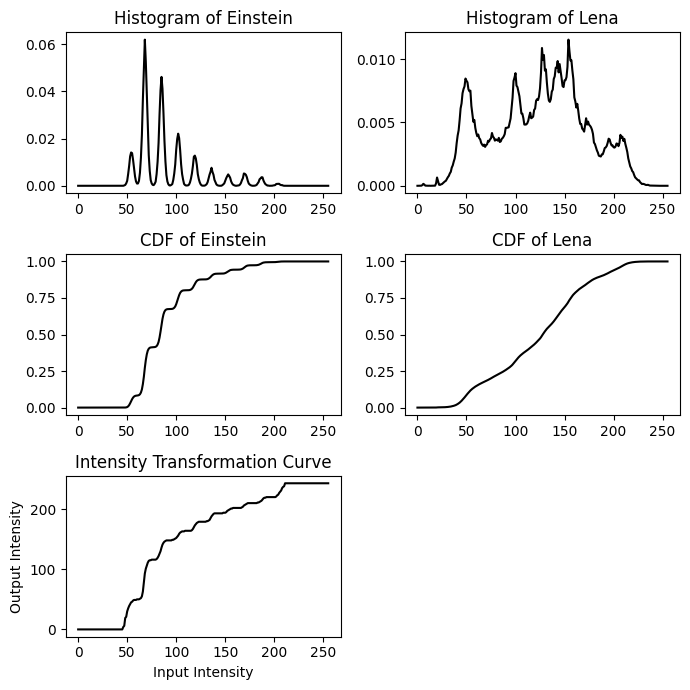

In [51]:
fig, axs = plt.subplots(3, 2, figsize=(7, 7))

axs[0, 0].plot(hist_einstein_norm, color='black')
axs[0, 0].set_title('Histogram of Einstein')
axs[0, 1].plot(hist_lena_norm, color='black')
axs[0, 1].set_title('Histogram of Lena')

axs[1, 0].plot(cdf_einstein, color='black')
axs[1, 0].set_title('CDF of Einstein')
axs[1, 1].plot(cdf_lena, color='black')
axs[1, 1].set_title('CDF of Lena')

axs[2, 0].plot(mapping, color='black')
axs[2, 0].set_title('Intensity Transformation Curve')
axs[2, 0].set_xlabel('Input Intensity')
axs[2, 0].set_ylabel('Output Intensity')

axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

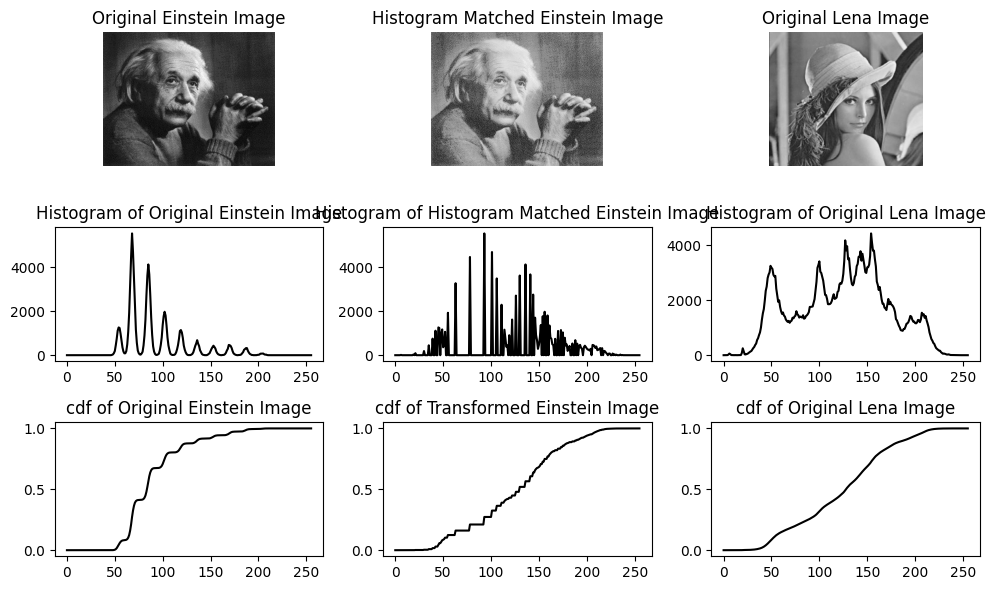

In [52]:
fig, axs = plt.subplots(3, 3, figsize=(10, 6))

axs[0, 0].imshow(einstein_img, cmap='gray')
axs[0, 0].set_title('Original Einstein Image')
axs[0, 0].axis('off')
axs[1, 0].plot(hist_einstein, color='black')
axs[1, 0].set_title('Histogram of Original Einstein Image')
axs[2, 0].plot(cdf_einstein, color='black')
axs[2, 0].set_title('cdf of Original Einstein Image')

axs[0, 1].imshow(einstein_matched, cmap='gray')
axs[0, 1].set_title('Histogram Matched Einstein Image')
axs[0, 1].axis('off')
axs[1, 1].plot(hist_einstein_matched, color='black')
axs[1, 1].set_title('Histogram of Histogram Matched Einstein Image')
axs[2, 1].plot(cdf_transform, color='black')
axs[2, 1].set_title('cdf of Transformed Einstein Image')

axs[0, 2].imshow(lena_img, cmap='gray')
axs[0, 2].set_title('Original Lena Image')
axs[0, 2].axis('off')
axs[1, 2].plot(hist_lena, color='black')
axs[1, 2].set_title('Histogram of Original Lena Image')
axs[2, 2].plot(cdf_lena, color='black')
axs[2, 2].set_title('cdf of Original Lena Image')

plt.tight_layout()
plt.show()

3. Perform gamma transformation and histogram equalization (separately) on the given hazy image (Fig. 3 (a)) to enhance the contrast of the image. Choose the parameter (if any) of these transformations such that the resultant images have dehazing effects. Fuse both the images to generate a single image such that it has a better visual appearance. Note that the ojective is to get a better dehazed result. Now, consider the haze model

I(x) = J(x)t(x) + A(1 − t(x)),

where I(x) is the given hazy image. J(x) can be approximated with resultant image that have been generated by fusing the results of gamma transformation and histogram equalization. Assume the atmospheric light is A = [0.8159, 0.8186, 0.8272]. Now estimate the transmission map t(x) using the above equation. To see the accuracy of the results, compute the Euclidean distance between the estimated transmission map and the given transmission map (Fig.3(b)). A lower distance indicates a better dehazing result.

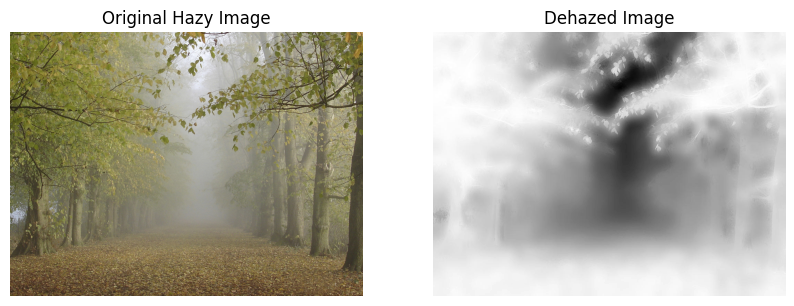

In [54]:
forest_img = cv2.imread('/content/forest.jpg')
trans_img = cv2.imread('/content/trans.jpg', cv2.IMREAD_GRAYSCALE)

forest_img = cv2.cvtColor(forest_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].imshow(forest_img)
axs[0].set_title('Original Hazy Image')
axs[0].axis('off')

axs[1].imshow(trans_img, cmap='gray')
axs[1].set_title('Dehazed Image')
axs[1].axis('off')

plt.show()


In [67]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)


gamma_corrected = adjust_gamma(forest_img, gamma=0.7)

ycrcb_img = cv2.cvtColor(forest_img, cv2.COLOR_RGB2YCrCb)
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
hist_equalized = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2RGB)

#fused_img = cv2.addWeighted(gamma_corrected, 1.5, hist_equalized, 1.5, 0)
# A = A.reshape((1, 1, 3))
# I = forest_img.astype('float32') / 255
# J = fused_img.astype('float32') / 255
# t_x = (I - A) / (np.maximum(J - A, 1e-6))
# t_x = np.clip(t_x, 0, 1)
# t_x = t_x.mean(axis=2)

A = np.array([0.8159, 0.8186, 0.8272])

def estimate_transmission(image, A):
    return 1 - np.min(image / A, axis=2)

transmission_map_gamma = estimate_transmission(gamma_corrected, A)
transmission_map_equalized = estimate_transmission(hist_equalized, A)
euclidean_distance_gamma = np.linalg.norm(transmission_map_gamma - trans_img)
euclidean_distance_equalized = np.linalg.norm(transmission_map_equalized - trans_img)

euclidean_distance = np.linalg.norm(t_x - trans_img / 255)
euclidean_distance

698.9663488108023

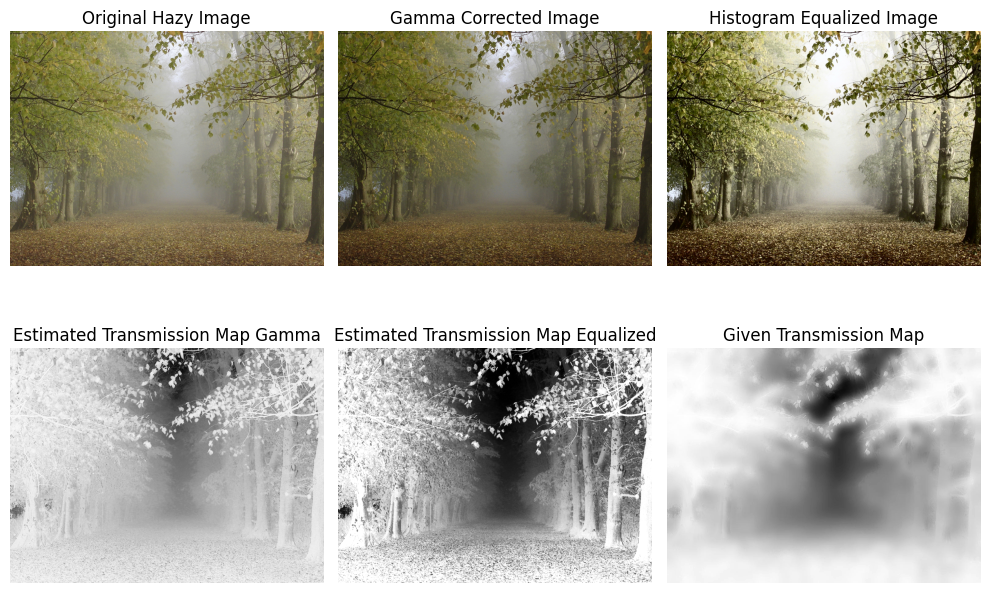

In [68]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

axs[0, 0].imshow(forest_img)
axs[0, 0].set_title('Original Hazy Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(gamma_corrected)
axs[0, 1].set_title('Gamma Corrected Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(hist_equalized)
axs[0, 2].set_title('Histogram Equalized Image')
axs[0, 2].axis('off')

axs[1, 0].imshow(transmission_map_gamma,cmap='gray')
axs[1, 0].set_title('Estimated Transmission Map Gamma')
axs[1, 0].axis('off')

axs[1, 1].imshow(transmission_map_equalized, cmap='gray')
axs[1, 1].set_title('Estimated Transmission Map Equalized')
axs[1, 1].axis('off')

axs[1, 2].imshow(trans_img, cmap='gray')
axs[1, 2].set_title('Given Transmission Map')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

4. Consider the image of Fig.4 and apply unsharp masking and high boost filtering to enhance the
edges of the image. Vary the scaling factor from 2 to 4 for high-boost filtering. Consider a row of the
original image and plot the intensity values. This kind of plot is known as the intensity profile of that
row. Plot similar intensity profiles (consider the same row) for the blurred image, unsharp mask,
sharpened image, and the high-boost filtered image. Explain your observation.

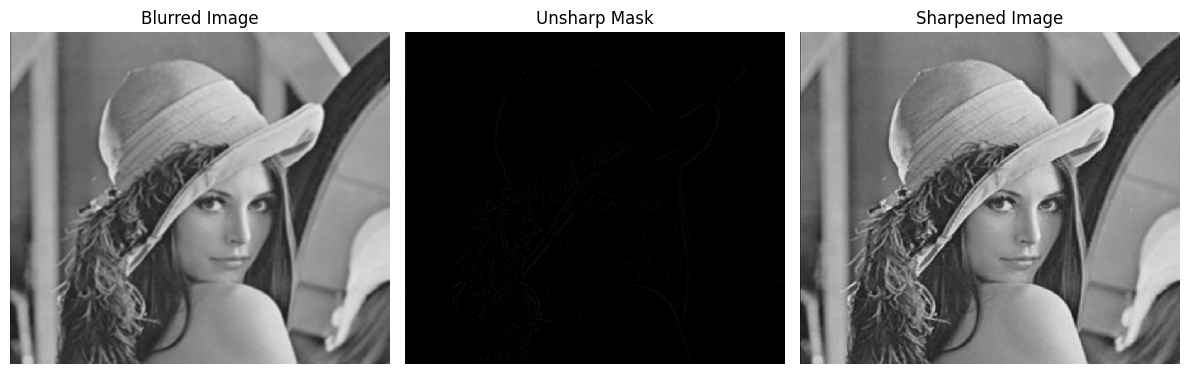

In [82]:
lena_face_img = cv2.imread('/content/lena_face.jpg', cv2.IMREAD_GRAYSCALE)

blurred_img = cv2.GaussianBlur(lena_face_img, (5, 5), 0)
unsharp_mask = cv2.subtract(lena_face_img, blurred_img)
sharpened_img = cv2.add(lena_face_img, unsharp_mask)

blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)
unsharp_mask_rgb = cv2.cvtColor(unsharp_mask, cv2.COLOR_BGR2RGB)
sharpened_img_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(blurred_img_rgb)
axs[0].set_title('Blurred Image')
axs[0].axis('off')

axs[1].imshow(unsharp_mask_rgb)
axs[1].set_title('Unsharp Mask')
axs[1].axis('off')

axs[2].imshow(sharpened_img_rgb)
axs[2].set_title('Sharpened Image')
axs[2].axis('off')

plt.tight_layout()

plt.show()

5. Smooth the image of Fig.4 by using Bilateral filtering. Compare the result with average filtering and
Gaussian smoothing (9 × 9 mask). Which result is better?–Explain your understanding.

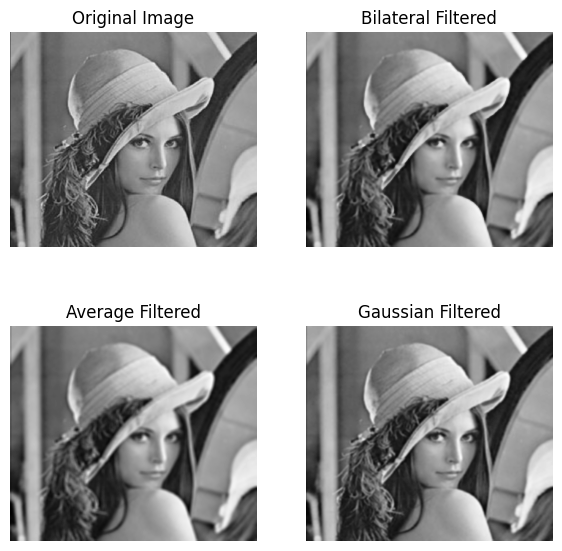

In [75]:
import cv2
import numpy as np

image = cv2.imread('/content/lena_face.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bilateral_filtered = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

average_filtered = cv2.blur(gray_image, (9, 9))

gaussian_filtered = cv2.GaussianBlur(gray_image, (9, 9), sigmaX=0)

plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(average_filtered, cmap='gray')
plt.title('Average Filtered')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.show()


6. Consider the image of Fig. 5 and process it to bring out more skeletal detail. (You may use a
combination of sharpening and smoothing operation)

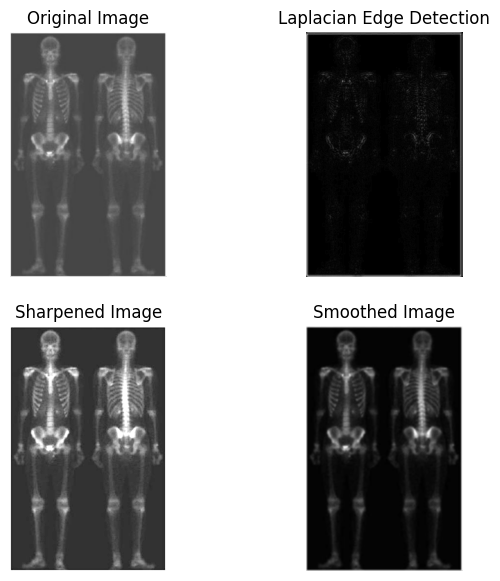

In [80]:
import cv2
import numpy as np

image = cv2.imread('/content/skeleton.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

smoothed_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

laplacian = cv2.Laplacian(smoothed_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

sharpened_image = cv2.addWeighted(gray_image, 1.5, laplacian, -0.5, 0)

plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()

7. Generate a 1D rectangular pulse rec(t) in time domain, perform the following operation on the
* Plot rec(t).
* Write a code to transform the signal into frequency domain.
* Plot the magnitude (magnitude spectrum).
* Vary the length of the rectangular pulse and observe the magnitude spectrum for each case.
* Write a code to perform inverse transformation from frequency domain to time domain with all
the frequency components.
* Instead of using all frequency-components to reconstruct the time-domain signal, select a range of
low-frequency components to reconstruct the time-domain signal. (Use a low pass filter with a
specified bandwidth)
* Compare the two reconstructed time-domain signals using all frequency-domain components and
partial frequency-domain components, respectively. What are the differences?
* Vary the bandwidth of the low pass filter for reconstruction, and observe the changes.2

In [96]:
pulse_duration = 10
pulse_amplitude = 1
total_duration = 100

t = np.linspace(0, total_duration, 1000)

pulse_signal = np.where((t >= total_duration/2 - pulse_duration/2) & (t <= total_duration/2 + pulse_duration/2), pulse_amplitude, 0)

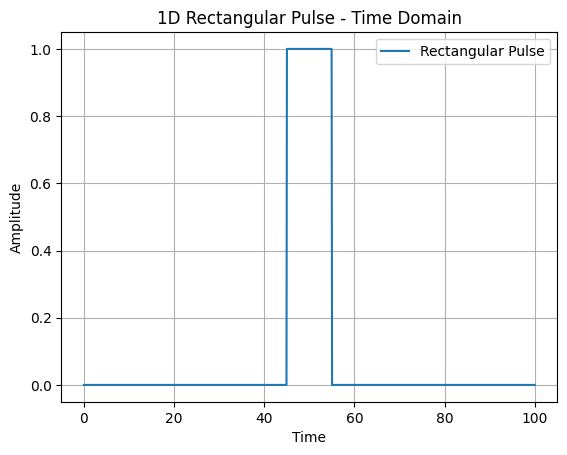

In [97]:
plt.plot(t, pulse_signal, label='Rectangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('1D Rectangular Pulse - Time Domain')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
fft_output = np.fft.fft(pulse_signal)
frequencies = np.fft.fftfreq(len(pulse_signal), d=(total_duration / len(pulse_signal)))

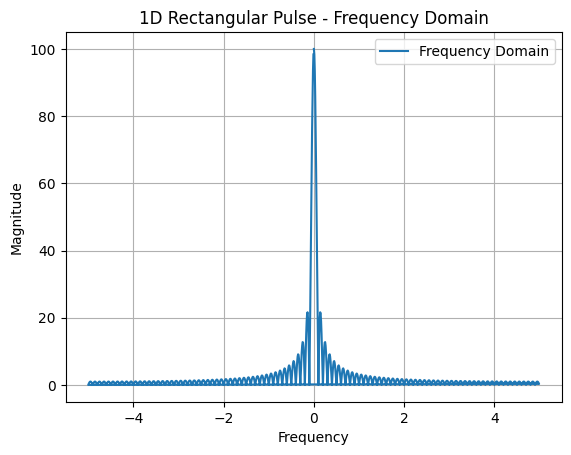

In [99]:
plt.plot(frequencies, np.abs(fft_output), label='Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('1D Rectangular Pulse - Frequency Domain')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
def plot_pulse_and_spectrum(pulse_duration, total_duration):
    t = np.linspace(0, total_duration, 1000)

    pulse_signal = np.where((t >= total_duration/2 - pulse_duration/2) & (t <= total_duration/2 + pulse_duration/2),
                            1, 0)

    fft_output = np.fft.fft(pulse_signal)
    frequencies = np.fft.fftfreq(len(pulse_signal), d=(total_duration / len(pulse_signal)))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, pulse_signal, label='Rectangular Pulse')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('1D Rectangular Pulse - Time Domain (Width: {})'.format(pulse_duration))
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(frequencies, np.abs(fft_output), label='Magnitude Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum (Width: {})'.format(pulse_duration))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


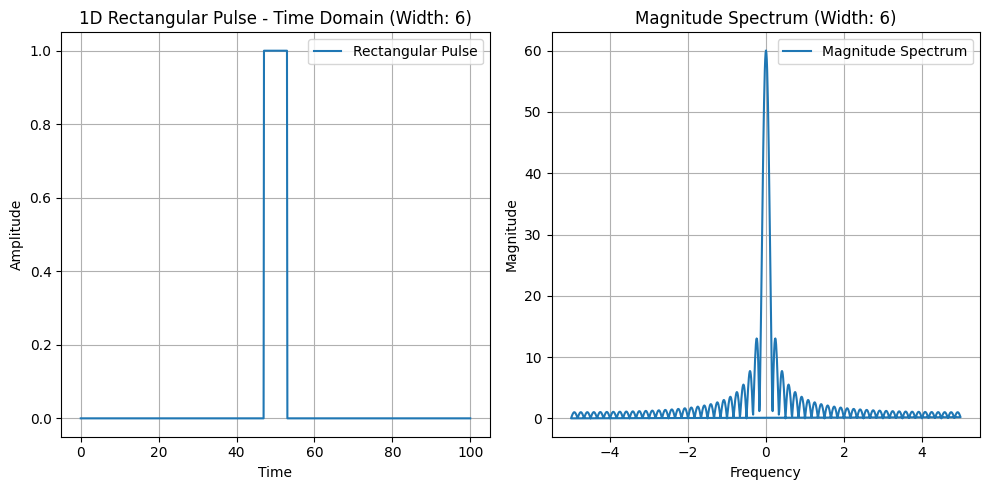

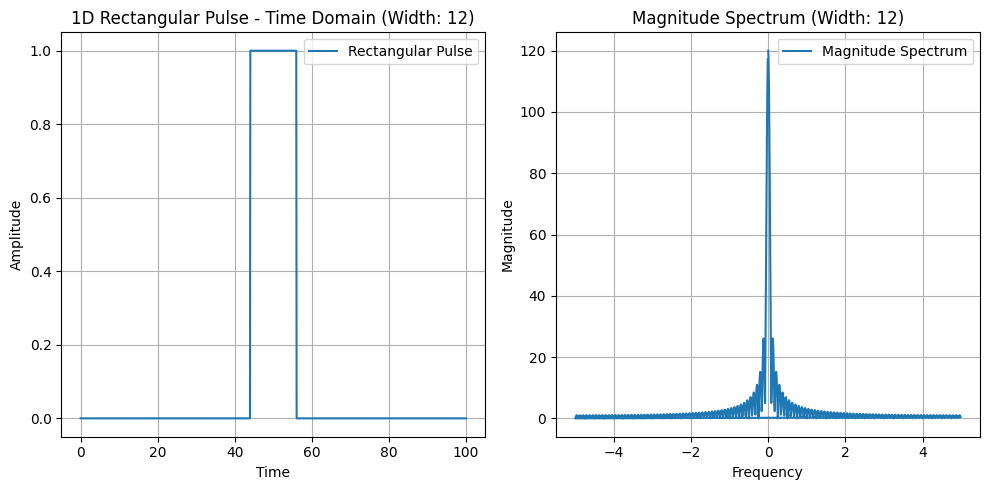

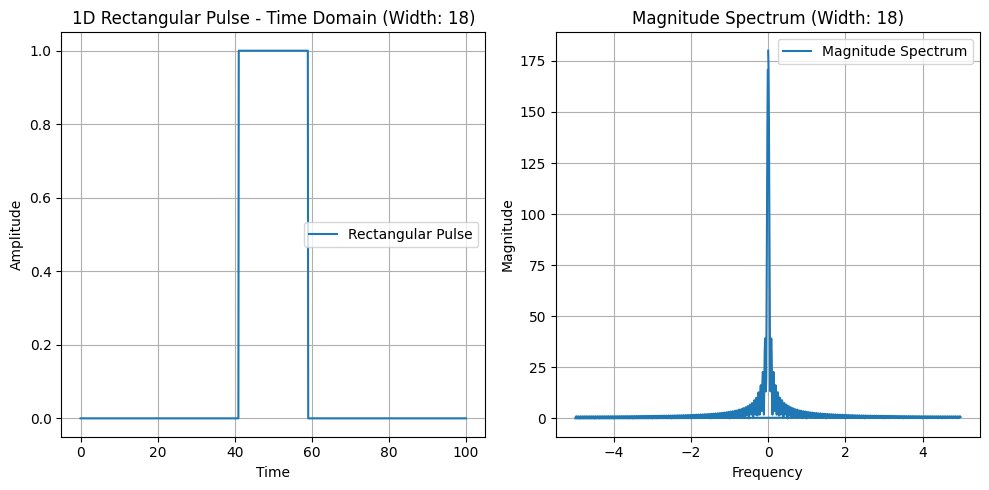

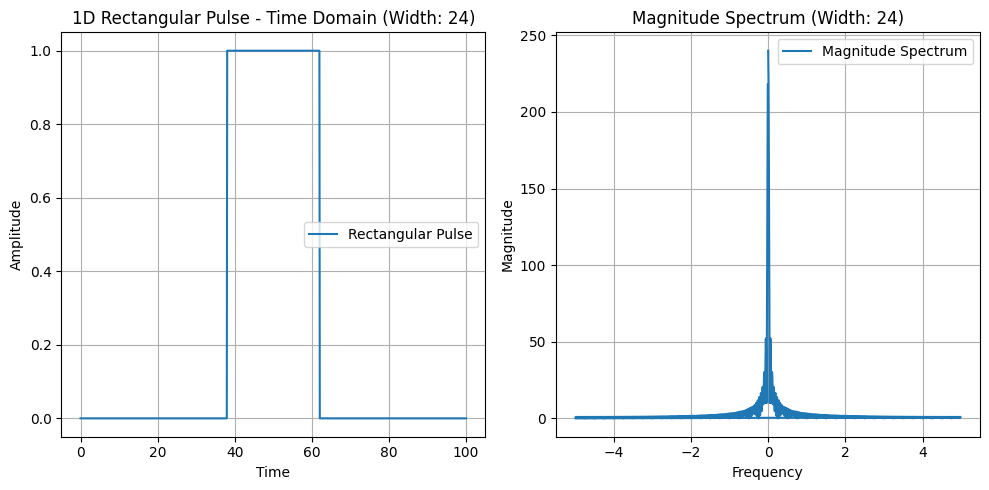

In [101]:
pulse_durations = [6, 12, 18, 24]
total_duration = 100

for pulse_duration in pulse_durations:
    plot_pulse_and_spectrum(pulse_duration, total_duration)

In [102]:
def inverse_transform(fft_output):
    inverse_signal = np.fft.ifft(fft_output)

    plt.plot(t, np.real(inverse_signal), label='Inverse Transform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Inverse Transform - Time Domain')
    plt.legend()
    plt.grid(True)
    plt.show()

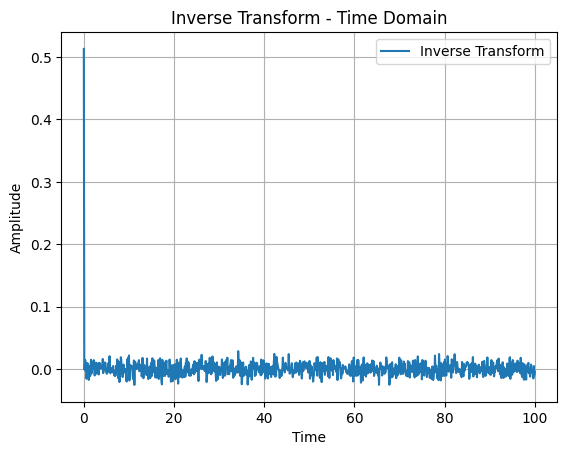

In [103]:
example_fft_output = np.random.rand(len(pulse_signal)) + 1j * np.random.rand(len(pulse_signal))
inverse_transform(example_fft_output)


In [104]:
def low_pass_filter(fft_output, cutoff_frequency, total_duration):
    frequencies = np.fft.fftfreq(len(fft_output), d=(total_duration / len(fft_output)))
    filtered_fft_output = np.where(np.abs(frequencies) <= cutoff_frequency, fft_output, 0)
    return filtered_fft_output

def inverse_transform(filtered_fft_output):
    inverse_signal = np.fft.ifft(filtered_fft_output)
    return np.real(inverse_signal)

def plot_low_pass_filtered_signal(cutoff_frequency, pulse_duration, total_duration):
    t = np.linspace(0, total_duration, 1000)
    pulse_signal = np.where((t >= total_duration/2 - pulse_duration/2) & (t <= total_duration/2 + pulse_duration/2),
                            1, 0)
    fft_output = np.fft.fft(pulse_signal)
    filtered_fft_output = low_pass_filter(fft_output, cutoff_frequency, total_duration)
    reconstructed_signal = inverse_transform(filtered_fft_output)

    plt.plot(t, pulse_signal, label='Original Rectangular Pulse')
    plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Reconstructed Signal (Low-pass Filter, Cutoff Frequency: {})'.format(cutoff_frequency))
    plt.legend()
    plt.grid(True)
    plt.show()



In [105]:
pulse_duration = 18
total_duration = 100
cutoff_frequency = 0.1

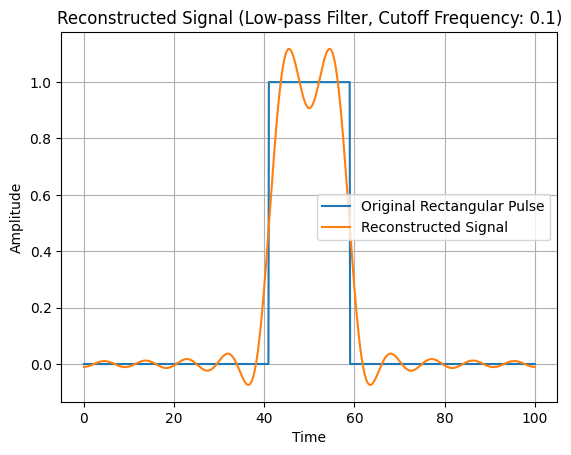

In [106]:
plot_low_pass_filtered_signal(cutoff_frequency, pulse_duration, total_duration)

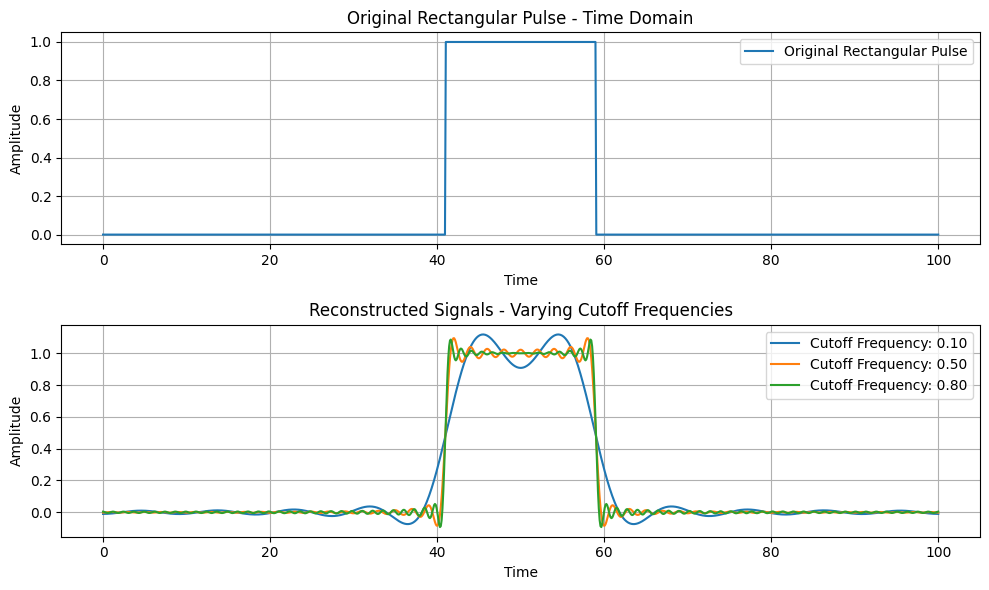

In [107]:
def plot_signals(pulse_duration, total_duration, cutoff_frequencies):
    t = np.linspace(0, total_duration, 1000)
    pulse_signal = np.where((t >= total_duration/2 - pulse_duration/2) & (t <= total_duration/2 + pulse_duration/2),
                            1, 0)
    fft_output = np.fft.fft(pulse_signal)

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, pulse_signal, label='Original Rectangular Pulse')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original Rectangular Pulse - Time Domain')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)

    for cutoff_frequency in cutoff_frequencies:
        filtered_fft_output = low_pass_filter(fft_output, cutoff_frequency, total_duration)
        reconstructed_signal = inverse_transform(filtered_fft_output)
        plt.plot(t, reconstructed_signal, label='Cutoff Frequency: {:.2f}'.format(cutoff_frequency))

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Reconstructed Signals - Varying Cutoff Frequencies')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

pulse_duration = 18
total_duration = 100
cutoff_frequencies = [0.1, 0.5, 0.8]

plot_signals(pulse_duration, total_duration, cutoff_frequencies)
